In [11]:
# sklearn worst one: nyc-taxi-green-dec-2016_d10_l855_n1709_20241010145519
# sklearn dp but no merge: nyc-taxi-green-dec-2016_d10_l858_n1715_20241010162144
# sklearn 

# result_file = 'result.csv'
result_file = 'result_sklearn.csv'
model = 'nyc-taxi-green-dec-2016_d10_l855_n1709_20241010145519'

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
105,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,0,0.000000,nyc-taxi-green-dec-2016,1G,1,2.538735
106,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,1,0.425445,nyc-taxi-green-dec-2016,1G,1,1.999246
107,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,2,0.425445,nyc-taxi-green-dec-2016,1G,1,11.512381
108,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,1,0.850889,nyc-taxi-green-dec-2016,1G,1,2.185455
109,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,2,0.850889,nyc-taxi-green-dec-2016,1G,1,10.706440
110,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,1,1.276334,nyc-taxi-green-dec-2016,1G,1,1.911877
111,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,2,1.276334,nyc-taxi-green-dec-2016,1G,1,9.893741
112,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,1,1.701778,nyc-taxi-green-dec-2016,1G,1,1.187156
113,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,2,1.701778,nyc-taxi-green-dec-2016,1G,1,6.438902
114,nyc-taxi-green-dec-2016_d10_l855_n1709_2024101...,1,2.127223,nyc-taxi-green-dec-2016,1G,1,1.161160


In [13]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 12.048967196901021)

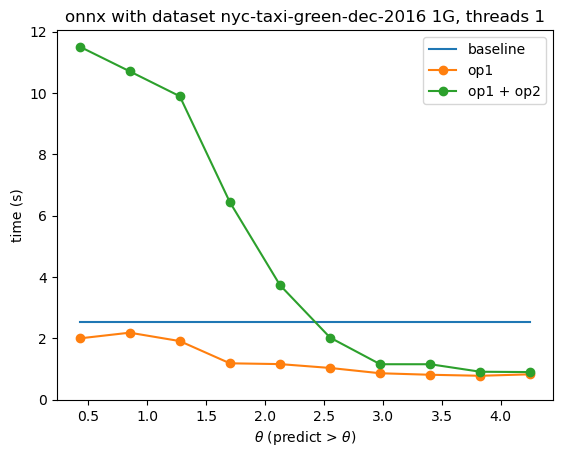

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 3.403600176453908)

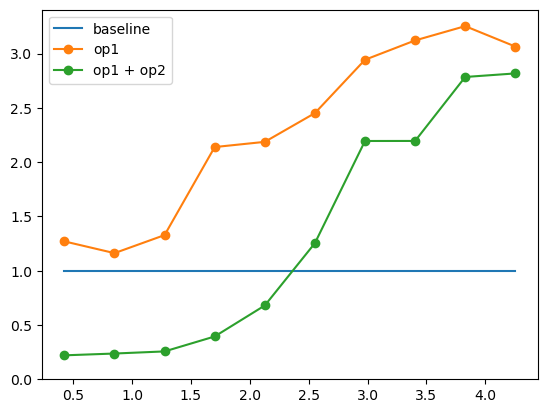

In [15]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)